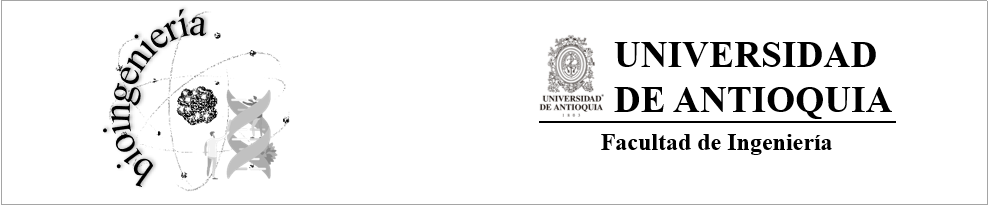

# Convolutional Neural Networks - CNN

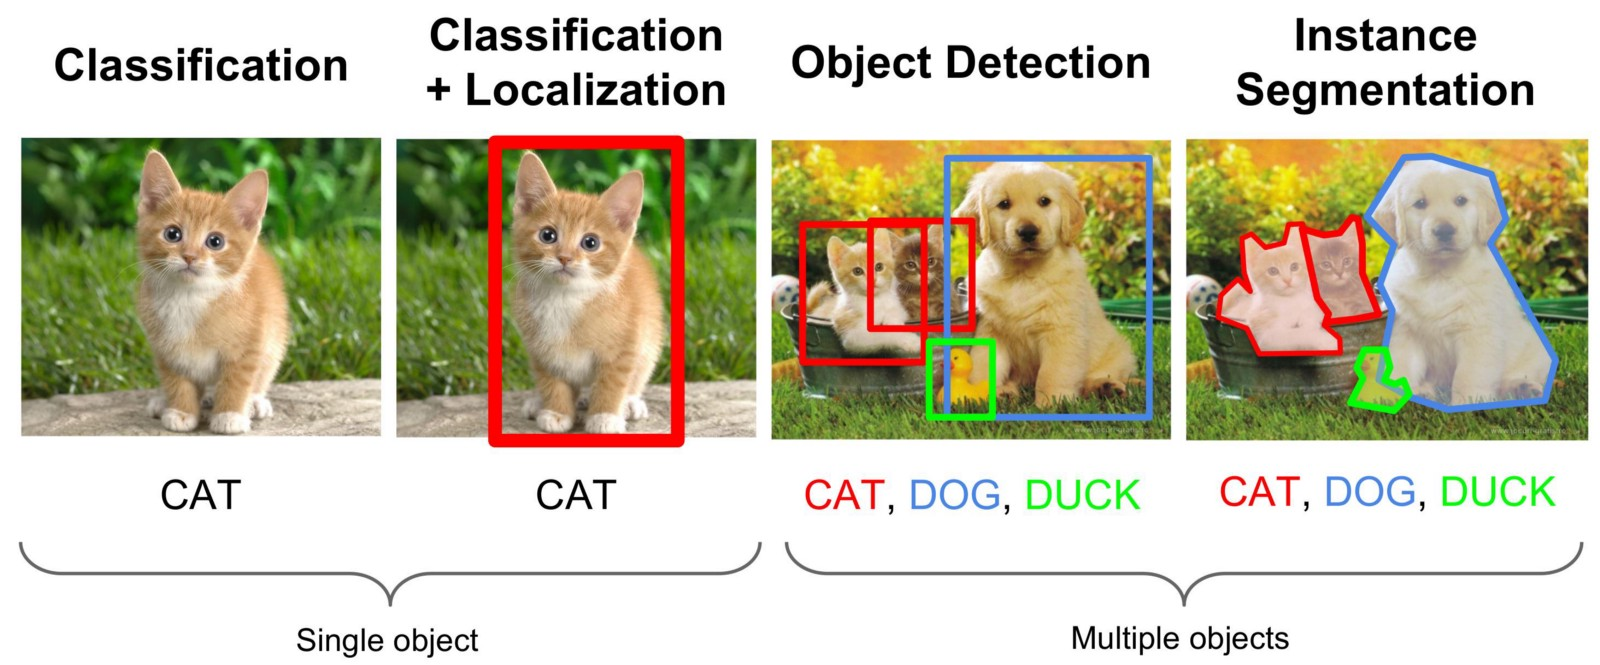

Lecturas complementarias sobre CNN
1.  https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd

2. <a href="https://ml4a.github.io/demos/convolution_all/" target="_blank">filter activation demo</a> <a href="https://ml4a.github.io/demos/confusion_cifar/" target="_blank">confusion matrix</a>

3. <a href="https://adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html" target="_blank">The 9 Deep Learning Papers You Should Know</a>

## Mapas de activaciones y filtros de primer nivel

Los filtros del medio se aplican a la imagen de la izquierda. Observe, por ejemplo, en qué partes de la imagen está activado el séptimo filtro de la primera fila (el anterior al último de la primera fila).


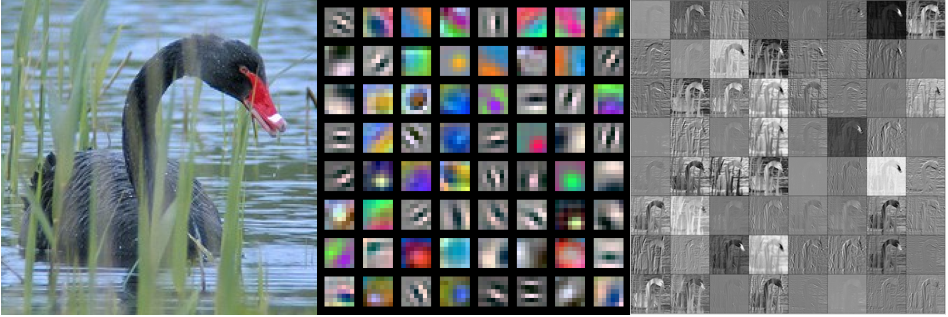

## Jerarquía de filtros y mapas de activación

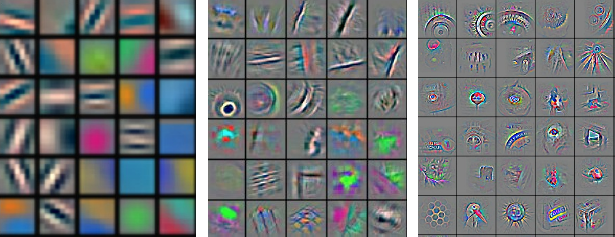

# Conceptos

<b>Convolución: </b> extracción de características


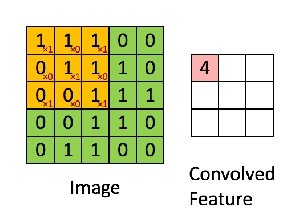

Filtra las imágenes y solo deja pasar las caraterísticas más importanes.


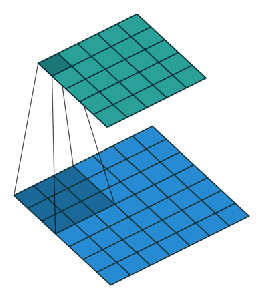

###  Convolución con imágenes en escala de grices



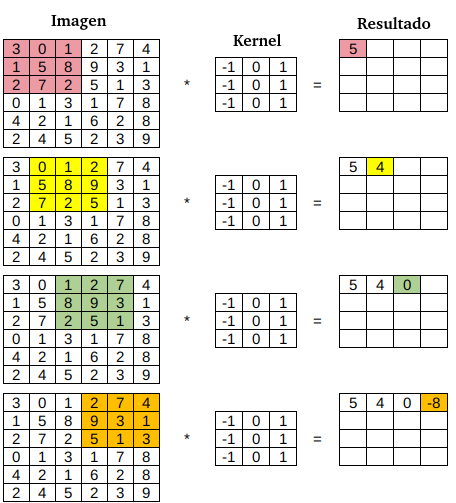

###  Convolución con imágenes RGB


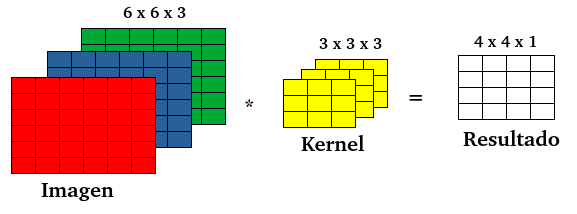

<b>Paddin: </b>Se aplica agregando píxeles de valor cero alrededor de la imagen original.
Tiene dos usos:
1. para que al realizar la convolución la imagen resultante sea de igual tamaño que la imagen original.
2.  cuando se tiene información relevante en las esquinas de la imagen



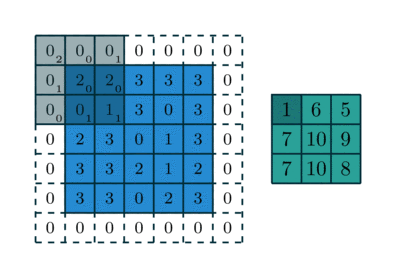


<b>Stride:</b> El filtro se mueve a través de la imagen de izquierda a derecha, de arriba a abajo, con un cambio de columna de un píxel en los movimientos horizontales, y luego un cambio de fila de un píxel en el movimientos verticales.

La cantidad de movimiento entre las aplicaciones del filtro a la imagen de entrada se denomina $stride$, y casi siempre es simétrica en las dimensiones de altura y anchura.


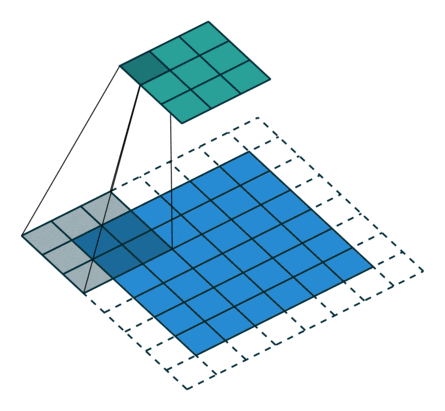

<b>Maxpool</b>

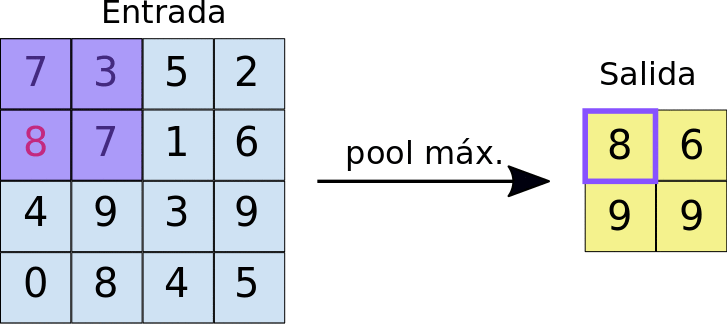

<b>Flatten:</b> Se realiza para convertir los datos multidimensionales en un vector de características 1D para ser utilizado por la siguiente capa que es la capa densa.

<b>Dropout: </b> es una técnica de regularización para reducir el sobreajuste en redes neuronales al evitar complejas adaptaciones en los datos de entrenamiento. Es una forma muy eficiente de realizar promedios de modelos con redes neuronales convolucionales (CNN). El término “dropout” se refiere a apagar unidades (tanto ocultas como visibles) en redes neuronales.

Documentación de capa convolucional (Conv2d) en keras <a href="https://keras.io/api/layers/convolution_layers/convolution2d/" target="_blank">Link</a>

# Experimentación

In [ ]:
!pip install progressbar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import sys
path = '/content/drive/MyDrive/Bioingeniería/3. Informática Médica/2025-I/Material de clase/23. CNN'
sys.path.append(path)

In [1]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mlutils

In [2]:
!wget -nc https://s3.amazonaws.com/rlx/mini_cifar.h5

--2025-05-22 12:47:26--  https://s3.amazonaws.com/rlx/mini_cifar.h5
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.193.159, 52.216.138.117, 3.5.24.156, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.193.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14803609 (14M) [binary/octet-stream]
Saving to: ‘mini_cifar.h5’

mini_cifar.h5       100%[===================>]  14.12M  2.93MB/s    in 12s     

2025-05-22 12:47:40 (1.14 MB/s) - ‘mini_cifar.h5’ saved [14803609/14803609]



In [3]:
import h5py
with h5py.File('mini_cifar.h5','r') as h5f:
    x_cifar = h5f["x"][:]
    y_cifar = h5f["y"][:]

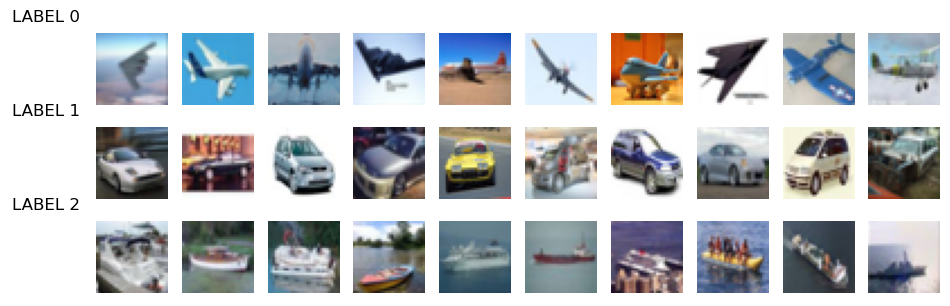

In [4]:
mlutils.show_labeled_image_mosaic(x_cifar, y_cifar)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.25)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\nDistribución de clases de entrenamiento (train)")
print(pd.Series(y_train).value_counts())
print("\nDistribución de clases de validación (test)")
print(pd.Series(y_test).value_counts())

(2253, 32, 32, 3) (2253,) (751, 32, 32, 3) (751,)

Distribución de clases de entrenamiento (train)
2    771
0    757
1    725
Name: count, dtype: int64

Distribución de clases de validación (test)
2    254
1    249
0    248
Name: count, dtype: int64


In [6]:
num_classes = len(np.unique(y_cifar))
img_size=32
compile=True

#tf.keras.reset_default_graph()
tf.keras.backend.clear_session()
print("usando",num_classes,"clases")
inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
layers = tf.keras.layers.Conv2D(15,(3,3), activation="relu", padding="SAME")(inputs)
layers = tf.keras.layers.Flatten()(layers)
layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dropout(0.2)(layers)
predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
model = tf.keras.Model(inputs = inputs, outputs=predictions)
if compile:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


usando 3 clases


2025-05-22 12:48:33.223245: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-22 12:48:33.223281: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-22 12:48:33.223299: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-22 12:48:33.223504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-22 12:48:33.223518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 15)     │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       245,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,247 (961.90 KB)

 Trainable params: 246,247 (961.90 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
num_classes = len(np.unique(y_cifar))
batch_size=32
epochs=10

#model.reset_states()
model.fit(x_train, y_train, epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test))
metrics = model.evaluate(x_test, y_test)
print(metrics)

Epoch 1/10


2025-05-22 12:49:59.787524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3931 - loss: 2.2594 - val_accuracy: 0.6045 - val_loss: 0.9733
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4214 - loss: 2.3407 - val_accuracy: 0.6445 - val_loss: 0.8634
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4512 - loss: 2.0549 - val_accuracy: 0.5952 - val_loss: 0.9460
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4660 - loss: 1.7693 - val_accuracy: 0.6738 - val_loss: 0.8080
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4915 - loss: 1.6508 - val_accuracy: 0.6272 - val_loss: 0.9092
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5358 - loss: 1.3047 - val_accuracy: 0.6764 - val_loss: 0.7650
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5389 - loss: 1.2773 - val_accuracy: 0.6085 - val_loss: 0.8009
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5375 - loss: 1.1564 - val_accuracy: 0.6525 - val_loss: 0.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion matrix, without normalization
[[178  32  38]
 [ 22 192  35]
 [ 90  33 131]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

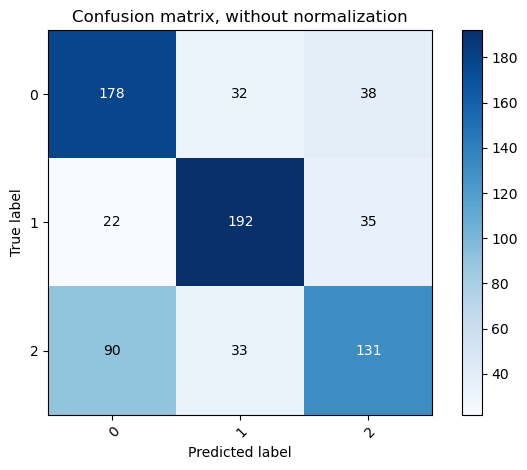

In [9]:
test_preds = model.predict(x_test).argmax(axis=1)
mlutils.plot_confusion_matrix(y_test, test_preds, classes=np.r_[0,1,2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


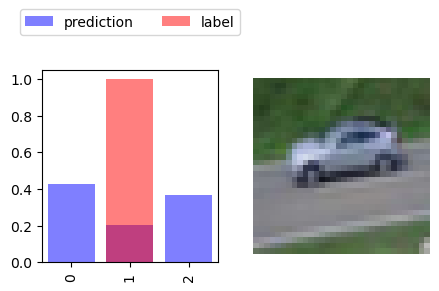

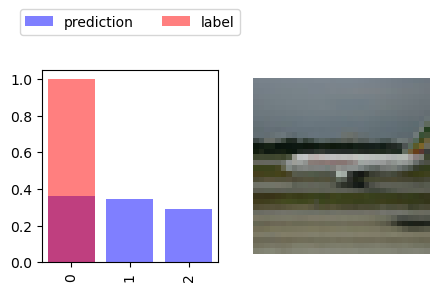

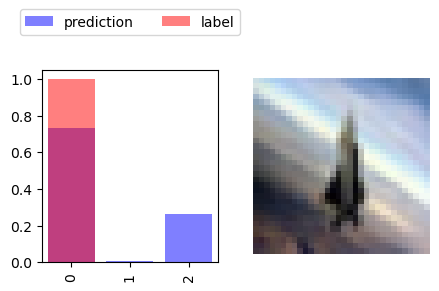

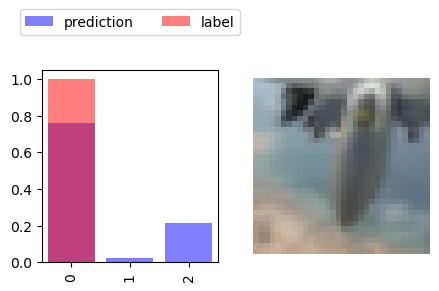

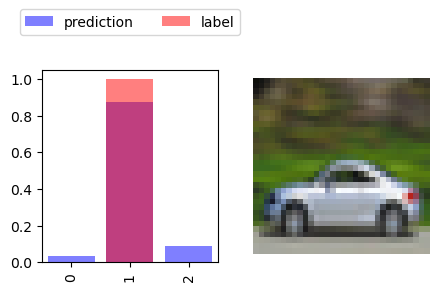

In [10]:
idxs = np.random.permutation(len(x_test))[:5]
preds = model.predict(x_test[idxs])
mlutils.show_preds(x_test[idxs],y_test[idxs], preds)

# Una arquitectura de red más compleja

In [11]:
img_size=32
compile=True

#tf.reset_default_graph()
tf.keras.backend.clear_session()
print("usando",num_classes,"clases")
inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
layers = tf.keras.layers.Conv2D(15,(5,5), activation="relu")(inputs)
layers = tf.keras.layers.MaxPool2D((2,2))(layers)
layers = tf.keras.layers.Conv2D(60,(5,5), activation="relu")(layers)
layers = tf.keras.layers.Flatten()(layers)
layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dropout(0.2)(layers)
predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
model2 = tf.keras.Model(inputs = inputs, outputs=predictions)
if compile:
    model2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

usando 3 clases


In [12]:
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 15)     │         1,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 60)     │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        96,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,767 (467.84 KB)

 Trainable params: 119,767 (467.84 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
num_classes = len(np.unique(y_cifar))
batch_size=32
epochs=10

#model2.reset_states()
model2.fit(x_train, y_train, epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test))
metrics = model2.evaluate(x_test, y_test)
print(metrics)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3561 - loss: 1.3117 - val_accuracy: 0.3728 - val_loss: 1.0469
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4231 - loss: 1.0663 - val_accuracy: 0.5672 - val_loss: 0.9618
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4963 - loss: 1.0653 - val_accuracy: 0.5832 - val_loss: 0.9278
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5314 - loss: 0.9688 - val_accuracy: 0.6285 - val_loss: 0.8626
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5313 - loss: 0.9986 - val_accuracy: 0.5872 - val_loss: 0.8939
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5437 - loss: 1.0904 - val_accuracy: 0.6498 - val_loss: 0.8170
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5793 - loss: 0.9541 - val_accuracy: 0.6152 - val_loss: 0.8747
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5749 - loss: 0.9753 - val_accuracy: 0.6498 - v

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion matrix, without normalization
[[163  15  70]
 [ 13 170  66]
 [ 74  20 160]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

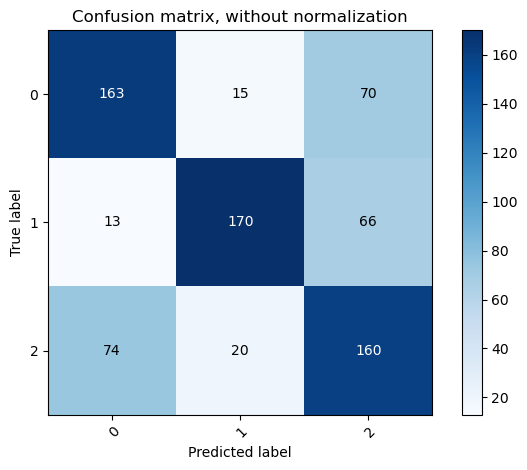

In [14]:
test_preds = model2.predict(x_test).argmax(axis=1)
mlutils.plot_confusion_matrix(y_test, test_preds, classes=np.r_[0,1,2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


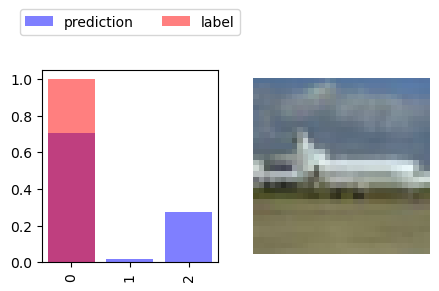

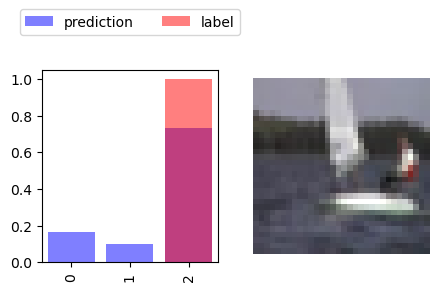

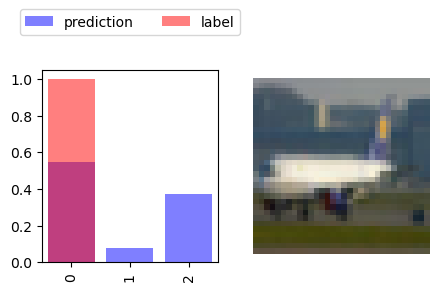

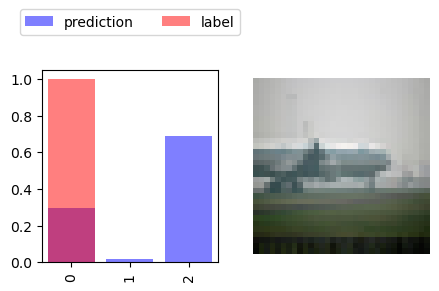

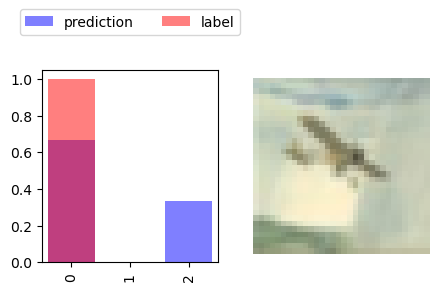

In [15]:
idxs = np.random.permutation(len(x_test))[:5]
preds = model2.predict(x_test[idxs])
mlutils.show_preds(x_test[idxs],y_test[idxs], preds)

# Con filtros más grandes

In [16]:
img_size=32
compile=True

#tf.reset_default_graph()
tf.keras.backend.clear_session()
print("usando",num_classes,"clases")
inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
layers = tf.keras.layers.Conv2D(96,(11,11), activation="relu")(inputs)
layers = tf.keras.layers.MaxPool2D((2,2))(layers)
layers = tf.keras.layers.Conv2D(60,(11,11), activation="relu")(layers)
layers = tf.keras.layers.Flatten()(layers)
layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
model3 = tf.keras.Model(inputs = inputs, outputs=predictions)
if compile:
    model3.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

usando 3 clases


In [17]:
model3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 22, 22, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 1, 60)       │       697,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 732,991 (2.80 MB)

 Trainable params: 732,991 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
num_classes = len(np.unique(y_cifar))
batch_size=32
epochs=10

#model3.reset_states()
model3.fit(x_train, y_train, epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test))
metrics = model3.evaluate(x_test, y_test)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3685 - loss: 1.2656 - val_accuracy: 0.3316 - val_loss: 1.0909
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3733 - loss: 1.0987 - val_accuracy: 0.3995 - val_loss: 1.0939
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3877 - loss: 1.2205 - val_accuracy: 0.3875 - val_loss: 1.0579
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4068 - loss: 1.1195 - val_accuracy: 0.4621 - val_loss: 1.0039
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4529 - loss: 1.0702 - val_accuracy: 0.4075 - val_loss: 1.0251
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4481 - loss: 1.0599 - val_accuracy: 0.5073 - val_loss: 0.9653
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4990 - loss: 1.0106 - val_accuracy: 0.5832 - val_loss: 0.9135
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5193 - loss: 0.9915 - val_accuracy: 0.5579 - v

In [19]:
metrics

[0.8926836252212524, 0.5885486006736755]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion matrix, without normalization
[[130  61  57]
 [ 19 205  25]
 [ 79  68 107]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

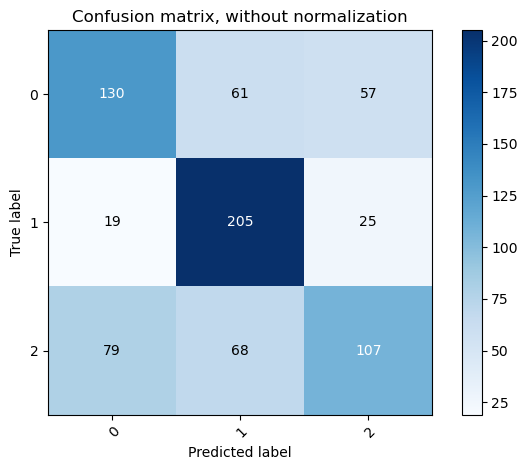

In [20]:
test_preds = model3.predict(x_test).argmax(axis=1)
mlutils.plot_confusion_matrix(y_test, test_preds, classes=np.r_[0,1,2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


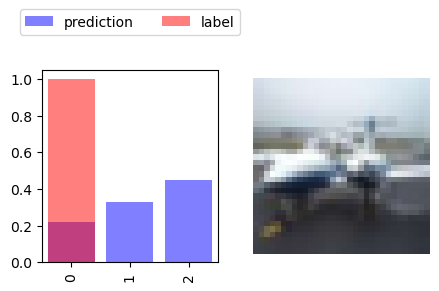

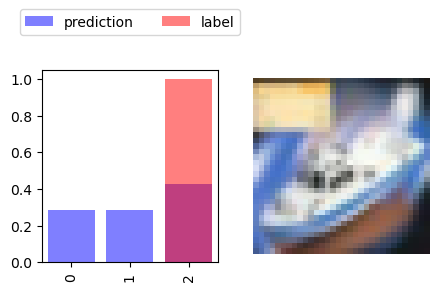

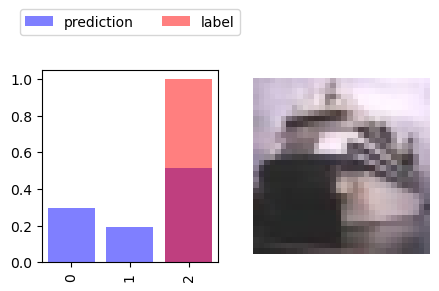

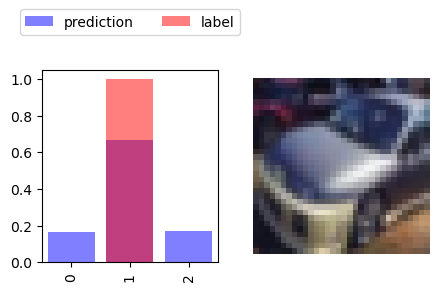

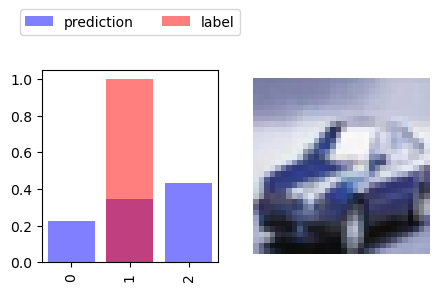

In [21]:
idxs = np.random.permutation(len(x_test))[:5]
preds = model3.predict(x_test[idxs])
mlutils.show_preds(x_test[idxs],y_test[idxs], preds)